In [182]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import math



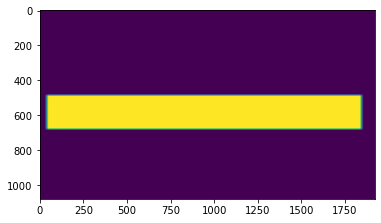

In [183]:
# マスク用単一色画像を作成
height = 100 # 生成画像の高さ
width = 100 # 生成画像の幅
imgMask = np.full((height, width, 1), 1, dtype=np.uint8)



# マスク範囲を四角形で描画
boxFromX = 2 #マスク範囲開始位置 X座標
boxFromY = 45 #マスク範囲開始位置 Y座標
boxToX = 95 #マスク範囲終了位置 X座標
boxToY = 62 #マスク範囲終了位置 Y座標
cv2.rectangle(imgMask, (boxFromX, boxFromY), (boxToX, boxToY),(255), cv2.FILLED)

img_resize = cv2.resize(imgMask, dsize=[1920,1080], fx=None, fy=None)

# マスク結果画像を保存
cv2.imwrite("./mask/testMaskImg.jpg", img_resize)
plt.imshow(img_resize)

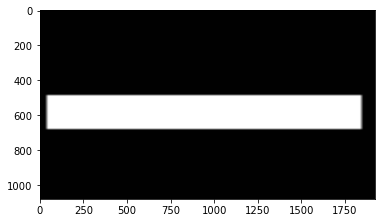

In [184]:
white=cv2.imread("./mask/white.jpg",cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/testMaskImg.jpg')
white_resize = cv2.resize(white, dsize=[1920,1080], fx=None, fy=None)
im_out = cv2.bitwise_and(white_resize, im_mask)
cv2.imwrite('./after/whitemask.jpg', im_out)
plt.imshow(im_out)

True

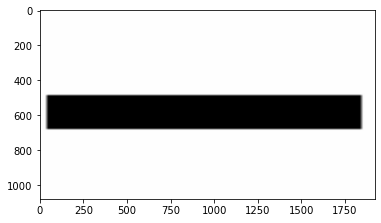

In [185]:
black=cv2.bitwise_not(im_out)
plt.imshow(black)
cv2.imwrite("./mask/blackmask.jpg",black)

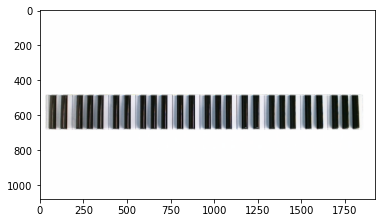

In [186]:
im_1 = cv2.imread('./before/hpiano0.jpg', cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/blackmask.jpg')
plt.imshow(im_1)
plt.imshow(im_mask)
im_out = cv2.bitwise_or(im_1, im_mask)
cv2.imwrite('./after/out.jpg', im_out)
plt.imshow(im_out)
simauma=im_out

In [187]:
# 画像をグレースケールで読み出しオブジェクトimg_grayに代入
img_gray = cv2.cvtColor(im_out,cv2.COLOR_BGR2GRAY)
# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(img_gray,(9,9)) 

threshold=70

# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV) 
# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

0 外接矩形の座標
[[119 675]
 [121 489]
 [154 490]
 [152 676]] 

1 外接矩形の座標
[[ 56 675]
 [ 58 489]
 [ 91 490]
 [ 89 676]] 

2 外接矩形の座標
[[1787  489]
 [1823  488]
 [1826  675]
 [1790  676]] 

3 外接矩形の座標
[[1729  489]
 [1764  488]
 [1767  675]
 [1732  676]] 

4 外接矩形の座標
[[1671  489]
 [1705  488]
 [1708  675]
 [1674  676]] 

5 外接矩形の座標
[[1582  489]
 [1616  488]
 [1619  675]
 [1585  676]] 

6 外接矩形の座標
[[1517  489]
 [1550  488]
 [1552  675]
 [1520  676]] 

7 外接矩形の座標
[[1431  489]
 [1461  488]
 [1462  675]
 [1433  676]] 

8 外接矩形の座標
[[1372  489]
 [1402  489]
 [1402  676]
 [1372  676]] 

9 外接矩形の座標
[[1313  489]
 [1342  489]
 [1342  675]
 [1313  675]] 

10 外接矩形の座標
[[1221  489]
 [1252  489]
 [1252  676]
 [1221  676]] 

11 外接矩形の座標
[[1155  489]
 [1188  489]
 [1188  676]
 [1155  676]] 

12 外接矩形の座標
[[1066  489]
 [1096  489]
 [1096  676]
 [1066  676]] 

13 外接矩形の座標
[[1005  489]
 [1035  489]
 [1035  676]
 [1005  676]] 

14 外接矩形の座標
[[945 489]
 [976 489]
 [976 676]
 [945 676]] 

15 外接矩形の座標
[[853 489]
 [885 489]
 [885 676]


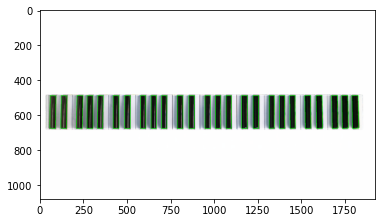

In [188]:
# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 2000, contours))


xleft=[]
xright=[]

ID=0
for i in contours:
    x=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    cv2.imwrite("./after/gaisetu"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    #print('回転角:')
    #print(rect[2])
   

    #各輪郭の左端、右端を取得
    for  r in box:
        x+=[r[0]]
    xleft +=[min(x)]
    xright+=[max(x)]

    ID+=1

In [189]:
print(xleft)

[119, 56, 1787, 1729, 1671, 1582, 1517, 1431, 1372, 1313, 1221, 1155, 1066, 1005, 945, 853, 786, 696, 636, 576, 485, 419, 328, 269, 208]


In [190]:
print(xright)

[154, 91, 1826, 1767, 1708, 1619, 1552, 1462, 1402, 1342, 1252, 1188, 1096, 1035, 976, 885, 819, 727, 667, 606, 517, 452, 362, 303, 246]


In [191]:
def bubble_sort(arr):
    change = True
    while change:
        change = False
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                change = True
    return arr

In [192]:
xleft=bubble_sort(xleft)
xright=bubble_sort(xright)
print(xleft)
print(xright)

kokken=[[xleft[0],xright[0]]]
i=1
while i<len(xleft):
    kokken+=[[xleft[i],xright[i]]]
    i+=1


[56, 119, 208, 269, 328, 419, 485, 576, 636, 696, 786, 853, 945, 1005, 1066, 1155, 1221, 1313, 1372, 1431, 1517, 1582, 1671, 1729, 1787]
[91, 154, 246, 303, 362, 452, 517, 606, 667, 727, 819, 885, 976, 1035, 1096, 1188, 1252, 1342, 1402, 1462, 1552, 1619, 1708, 1767, 1826]


In [193]:
i=0
base=white_resize

while i<len(xleft):
    cv2.rectangle(base,
              (xleft[i], 675),
              (xright[i], 490),
              (0, 0, 0),
              thickness=1,
              lineType=cv2.LINE_4,
              shift=0)

    i+=1


In [194]:
#端っこを追加
xright=[0]+xright
xleft =xleft+[1920]

In [195]:
#白い部分の座標
hakkenkari=[[xright[0],xleft[0]]]
i=1
while i<len(xleft):
    hakkenkari+=[[xright[i],xleft[i]]]
    i+=1
print(hakkenkari)

#白鍵の正確な座標
i=0
j=0
hakken=[]
while i<len(hakkenkari):
    haklen=hakkenkari[i][1]-hakkenkari[i][0]
    if  haklen>50:#別のところの値使いたい
        hakken+=[[hakkenkari[i][0],math.floor(hakkenkari[i][0]+haklen/2)]]+[[math.ceil(hakkenkari[i][0]+haklen/2),hakkenkari[i][1]]]
        
    else:
        hakken+=[[hakkenkari[i][0],hakkenkari[i][1]]]
    i+=1
print(hakken)

[[0, 56], [91, 119], [154, 208], [246, 269], [303, 328], [362, 419], [452, 485], [517, 576], [606, 636], [667, 696], [727, 786], [819, 853], [885, 945], [976, 1005], [1035, 1066], [1096, 1155], [1188, 1221], [1252, 1313], [1342, 1372], [1402, 1431], [1462, 1517], [1552, 1582], [1619, 1671], [1708, 1729], [1767, 1787], [1826, 1920]]
[[0, 28], [28, 56], [91, 119], [154, 181], [181, 208], [246, 269], [303, 328], [362, 390], [391, 419], [452, 485], [517, 546], [547, 576], [606, 636], [667, 696], [727, 756], [757, 786], [819, 853], [885, 915], [915, 945], [976, 1005], [1035, 1066], [1096, 1125], [1126, 1155], [1188, 1221], [1252, 1282], [1283, 1313], [1342, 1372], [1402, 1431], [1462, 1489], [1490, 1517], [1552, 1582], [1619, 1645], [1645, 1671], [1708, 1729], [1767, 1787], [1826, 1873], [1873, 1920]]


In [196]:
print(hakken)

[[0, 28], [28, 56], [91, 119], [154, 181], [181, 208], [246, 269], [303, 328], [362, 390], [391, 419], [452, 485], [517, 546], [547, 576], [606, 636], [667, 696], [727, 756], [757, 786], [819, 853], [885, 915], [915, 945], [976, 1005], [1035, 1066], [1096, 1125], [1126, 1155], [1188, 1221], [1252, 1282], [1283, 1313], [1342, 1372], [1402, 1431], [1462, 1489], [1490, 1517], [1552, 1582], [1619, 1645], [1645, 1671], [1708, 1729], [1767, 1787], [1826, 1873], [1873, 1920]]


In [197]:
print(kokken)

[[56, 91], [119, 154], [208, 246], [269, 303], [328, 362], [419, 452], [485, 517], [576, 606], [636, 667], [696, 727], [786, 819], [853, 885], [945, 976], [1005, 1035], [1066, 1096], [1155, 1188], [1221, 1252], [1313, 1342], [1372, 1402], [1431, 1462], [1517, 1552], [1582, 1619], [1671, 1708], [1729, 1767], [1787, 1826]]


[[0, 28], [28, 56], [91, 119], [154, 181], [181, 208], [246, 269], [303, 328], [362, 390], [391, 419], [452, 485], [517, 546], [547, 576], [606, 636], [667, 696], [727, 756], [757, 786], [819, 853], [885, 915], [915, 945], [976, 1005], [1035, 1066], [1096, 1125], [1126, 1155], [1188, 1221], [1252, 1282], [1283, 1313], [1342, 1372], [1402, 1431], [1462, 1489], [1490, 1517], [1552, 1582], [1619, 1645], [1645, 1671], [1708, 1729], [1767, 1787], [1826, 1873], [1873, 1920]]


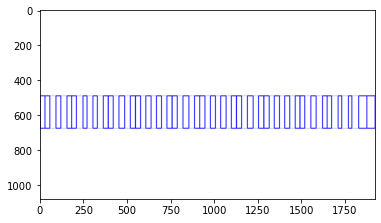

In [199]:

i=0
base=white_resize
while i<len(hakken):
    l=hakken[i][0]
    r=hakken[i][1]
    
    cv2.rectangle(base,
              (l,675),
              (r, 490),
              (0,0,255),
              thickness=3,
              lineType=cv2.LINE_4,
              shift=0)
    i+=1
cv2.imwrite("./after/hakken.jpg",base)
plt.imshow(base)
print(hakken)
